# Distribution by XXX - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
df = data[data.index > '2024-06-01 00:00:00']

In [5]:
# Hàm tính Fisher Transform
def fisher_transform(series, length=10):
    price = (series - series.rolling(length).min()) / (series.rolling(length).max() - series.rolling(length).min()) * 2 - 1
    price = price.clip(-0.99, 0.99)  # Giới hạn giá trị để tránh lỗi log
    fisher = 0.5 * np.log((1 + price) / (1 - price))
    fisher_signal = fisher.rolling(3).mean()  # Đường tín hiệu
    return fisher, fisher_signal



In [6]:

# Load dữ liệu giả lập (có thể thay bằng dữ liệu thực tế)
df['Fisher'], df['Fisher_signal'] = fisher_transform(df['Close'])

# Xác định điểm đảo chiều
df['Buy_Signal'] = (df['Fisher'] > df['Fisher_signal']) & (df['Fisher'].shift(1) < df['Fisher_signal'].shift(1))
df['Sell_Signal'] = (df['Fisher'] < df['Fisher_signal']) & (df['Fisher'].shift(1) > df['Fisher_signal'].shift(1))

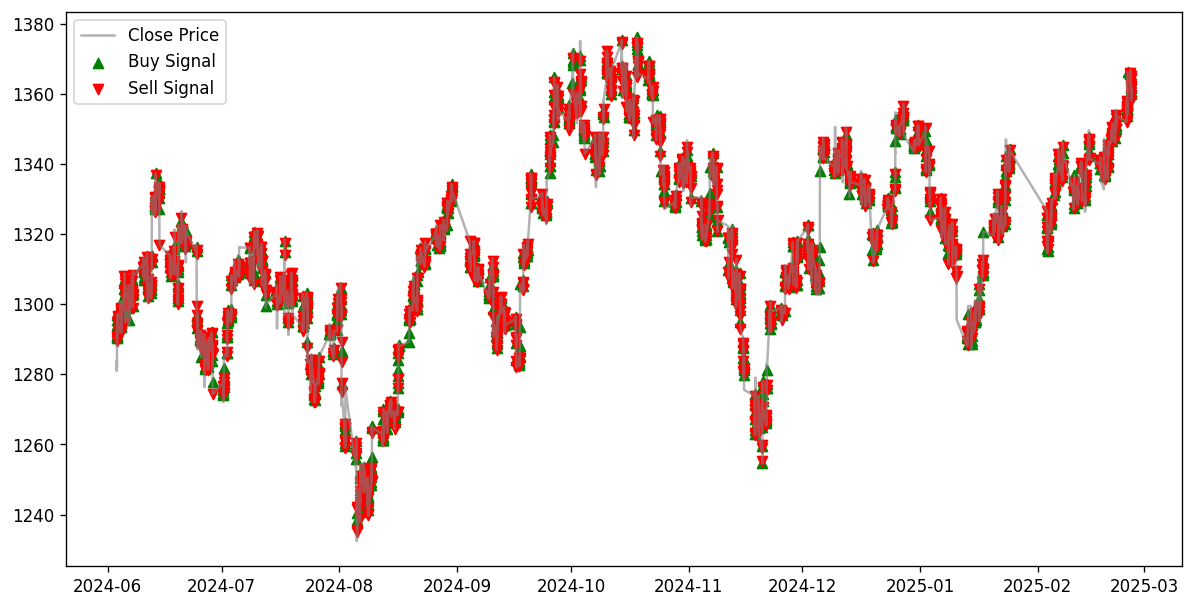

In [7]:

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.6)
plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], marker='v', color='red', label='Sell Signal', alpha=1)
plt.legend()
plt.show()

In [9]:
df[df.Buy_Signal == True].tail(20)

,Open,High,Low,Close,Volume,Fisher,Fisher_signal,Buy_Signal,Sell_Signal
Date,,,,,,,,,
2025-02-24 09:40:00,1354.8,1356.3,1354.8,1355.9,3072,2.646652,1.210159,True,False
2025-02-24 09:50:00,1355.3,1356.5,1355.2,1356.5,2610,2.646652,2.012448,True,False
2025-02-24 10:05:00,1356.0,1356.6,1356.0,1356.6,1359,2.646652,1.402367,True,False
2025-02-24 10:15:00,1356.6,1358.7,1356.0,1358.5,6356,2.646652,2.271855,True,False
2025-02-24 10:35:00,1356.6,1357.3,1356.5,1357.0,644,-0.034496,-0.072500,True,False
2025-02-24 10:50:00,1356.8,1357.8,1356.5,1357.6,1091,0.143841,-0.305013,True,False
2025-02-24 11:25:00,1354.7,1355.7,1354.5,1355.5,1872,-0.549306,-1.947537,True,False
2025-02-24 13:05:00,1354.7,1355.8,1354.5,1355.7,2076,-0.246238,-1.088833,True,False
2025-02-24 13:50:00,1355.9,1357.7,1355.9,1357.0,3474,2.646652,2.063062,True,False
